## Data Analytics Internship at Oasis Infobyte

### PROJECT 1 PROPOSAL LEVEL 1

### NAME : LOGAPRIYA S

## Data Loading and Cleaning

In [2]:
import pandas as pd
import numpy as np

# Load the datasets
dataset1 = pd.read_csv('retail_sales_dataset.csv')
dataset2 = pd.read_csv('menu.csv')


In [3]:
# Combine datasets if necessary
data = pd.concat([dataset1, dataset2], ignore_index=True)


In [4]:
# Display the first few rows of the datasets
print(dataset1.head())
print("------------------------------------------------------------------------------------------------------")
print(dataset2.head())
print("------------------------------------------------------------------------------------------------------")
print(data.head())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
------------------------------------------------------------------------------------------------------
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 E

In [5]:
# Data Cleaning
# Handle missing values
data.fillna(method='ffill', inplace=True)

# Convert date columns to datetime
data['Date'] = pd.to_datetime(data['Date'])


In [6]:
# Remove duplicates
data.drop_duplicates(inplace=True)


In [7]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction ID                 1260 non-null   float64       
 1   Date                           1260 non-null   datetime64[ns]
 2   Customer ID                    1260 non-null   object        
 3   Gender                         1260 non-null   object        
 4   Age                            1260 non-null   float64       
 5   Product Category               1260 non-null   object        
 6   Quantity                       1260 non-null   float64       
 7   Price per Unit                 1260 non-null   float64       
 8   Total Amount                   1260 non-null   float64       
 9   Category                       260 non-null    object        
 10  Item                           260 non-null    object        
 11  Serving Size     

## Descriptive Statistics

In [8]:
# Descriptive Statistics
descriptive_stats = data.describe()
print(descriptive_stats)


       Transaction ID                           Date          Age  \
count     1260.000000                           1260  1260.000000   
mean       603.571429  2023-06-16 02:14:51.428571392    42.549206   
min          1.000000            2023-01-01 00:00:00    18.000000   
25%        315.750000            2023-04-12 00:00:00    33.000000   
50%        630.500000            2023-05-15 12:00:00    47.000000   
75%        945.250000            2023-09-07 00:00:00    50.000000   
max       1000.000000            2024-01-01 00:00:00    64.000000   
std        327.235306                            NaN    12.396800   

          Quantity  Price per Unit  Total Amount     Calories  \
count  1260.000000     1260.000000   1260.000000   260.000000   
mean      2.820635      148.960317    386.666667   368.269231   
min       1.000000       25.000000     25.000000     0.000000   
25%       2.000000       30.000000     90.000000   210.000000   
50%       3.000000       30.000000    120.000000   34

In [9]:
# Mode for categorical columns
categorical_cols = ['Gender', 'Product Category']
modes = data[categorical_cols].mode()
print(modes)

  Gender Product Category
0   Male      Electronics


## Time Series Analysis

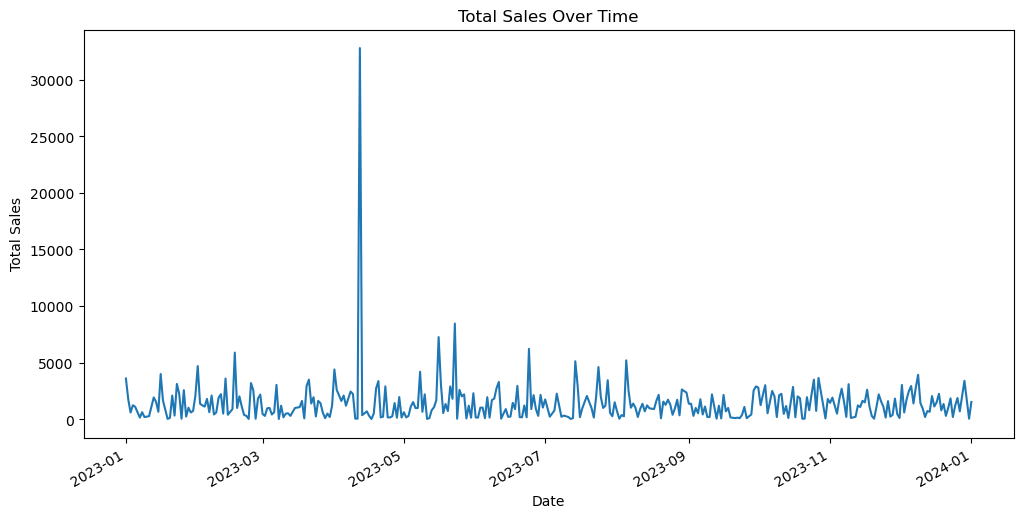

In [10]:
import matplotlib.pyplot as plt

# Create a new column for Year-Month
data['YearMonth'] = data['Date'].dt.to_period('M')

# Time Series Analysis: Total Sales Over Time
plt.figure(figsize=(12, 6))
data.groupby('Date')['Total Amount'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

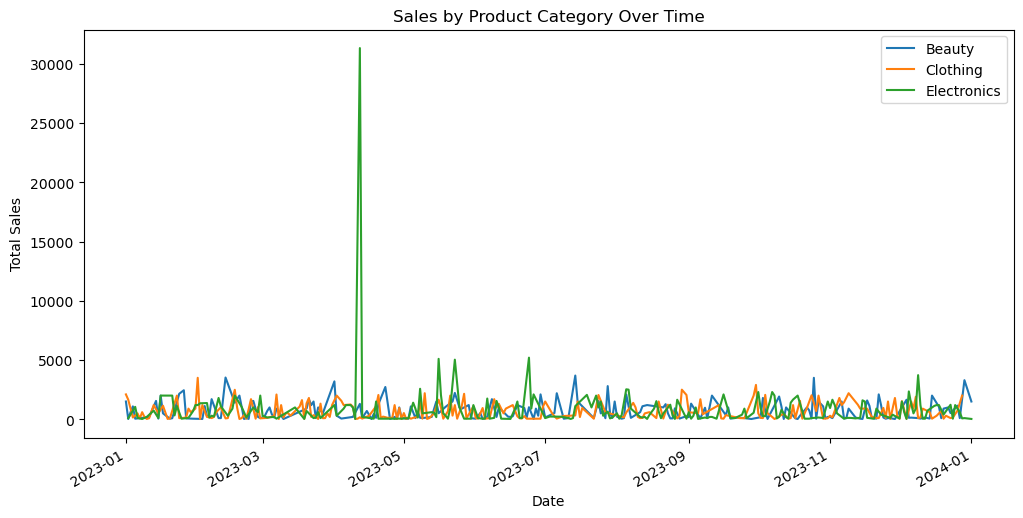

In [11]:
# Time Series Analysis: Sales by Product Category Over Time
plt.figure(figsize=(12, 6))
for category in data['Product Category'].unique():
    data[data['Product Category'] == category].groupby('Date')['Total Amount'].sum().plot(label=category)
plt.title('Sales by Product Category Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

## Customer and Product Analysis

In [12]:
# Customer Demographics Analysis
customer_demographics = data[['Customer ID', 'Age', 'Gender']].drop_duplicates()
print(customer_demographics.describe())


              Age
count  1000.00000
mean     41.39200
std      13.68143
min      18.00000
25%      29.00000
50%      42.00000
75%      53.00000
max      64.00000


In [13]:
# Analyzing Purchasing Behavior
purchasing_behavior = data.groupby('Customer ID').agg({
    'Total Amount': ['mean', 'sum', 'count'],
    'Product Category': 'nunique'
}).reset_index()
purchasing_behavior.columns = ['Customer ID', 'AvgPurchaseValue', 'TotalSales', 'PurchaseFrequency', 'UniqueProducts']
print(purchasing_behavior.head())


  Customer ID  AvgPurchaseValue  TotalSales  PurchaseFrequency  UniqueProducts
0     CUST001             150.0       150.0                  1               1
1     CUST002            1000.0      1000.0                  1               1
2     CUST003              30.0        30.0                  1               1
3     CUST004             500.0       500.0                  1               1
4     CUST005             100.0       100.0                  1               1


## Visualization

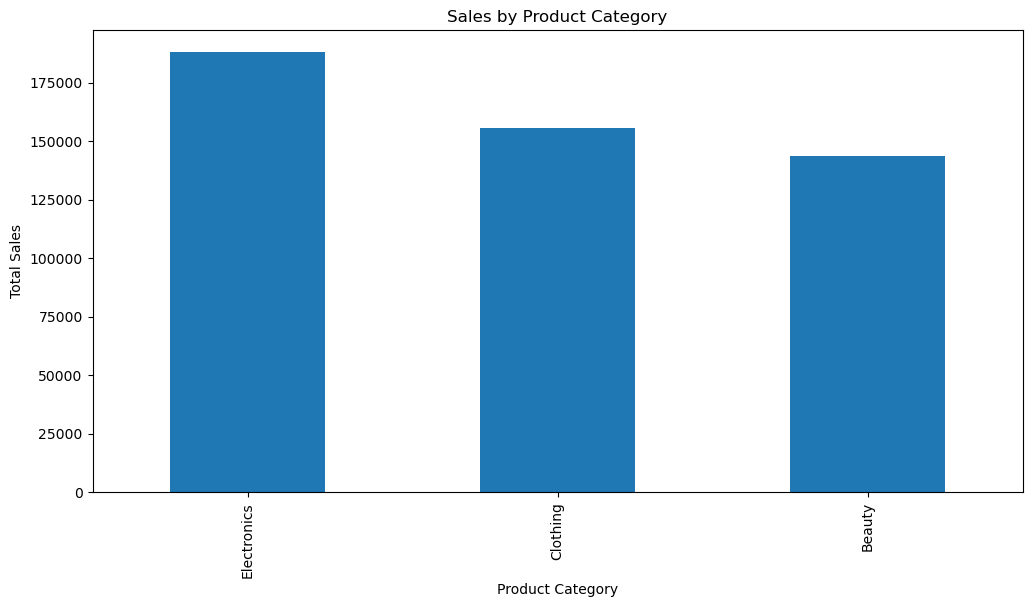

In [14]:
import seaborn as sns

# Bar chart of sales by product category
plt.figure(figsize=(12, 6))
data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()


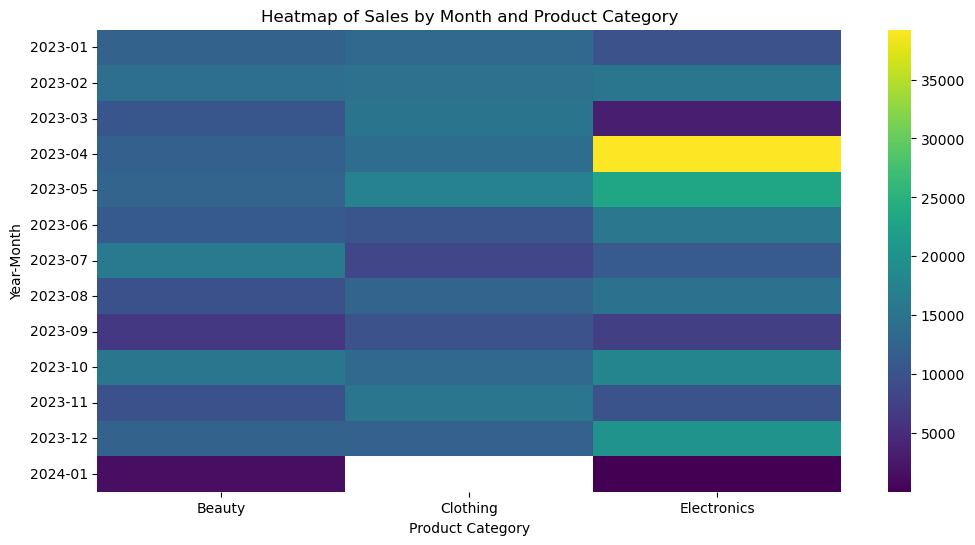

In [12]:
# Heatmap of sales by month and product category
sales_heatmap = data.groupby(['YearMonth', 'Product Category'])['Total Amount'].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(sales_heatmap, cmap='viridis')
plt.title('Heatmap of Sales by Month and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Year-Month')
plt.show()

## Recommendations

In [13]:
# Recommendations
recommendations = """
1. Increase inventory for top-selling product categories during peak sales months.
2. Implement targeted marketing campaigns for customer segments with high purchasing behavior.
3. Improve customer retention by offering loyalty programs to frequent buyers.
4. Optimize sales strategies by understanding seasonal trends and adjusting marketing efforts accordingly.
"""

print(recommendations)



1. Increase inventory for top-selling product categories during peak sales months.
2. Implement targeted marketing campaigns for customer segments with high purchasing behavior.
3. Improve customer retention by offering loyalty programs to frequent buyers.
4. Optimize sales strategies by understanding seasonal trends and adjusting marketing efforts accordingly.

